In [1]:
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'


In [2]:
from keras import backend as K
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
K.set_session(sess)

Using TensorFlow backend.


In [3]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Keras modules

In [5]:
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Activation
from keras.layers import Conv2D, AveragePooling2D, BatchNormalization, Dropout, MaxPooling2D

## Cargo datos

In [6]:
from keras.datasets import cifar10
((x, y), (x_test,y_test)) = cifar10.load_data()

In [7]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.1)

## Paso a float

In [8]:
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_valid /= 255
x_test /= 255

In [9]:
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_valid)

## Red neuronal: CNN tipo VGG-11

In [20]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), input_shape=(32,32,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
activation_6 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 64)          18496     
__________

In [21]:
# Callbacks
checkpoint_file='checkpoint.cifar10-cnn-tipo-VGG-16.hdf5'
earlystop = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=2)
checkpointer = ModelCheckpoint(monitor='val_acc',filepath=checkpoint_file, verbose=1, save_best_only=True)

In [22]:
x_train.shape

(45000, 32, 32, 3)

In [23]:
y_train_categorical.shape

(45000, 10)

In [24]:
batch_size = 64
epocs = 100

history = model.fit(x_train, 
        y_train_categorical,
        epochs=epocs, batch_size=batch_size, 
        verbose=1, 
        validation_data = (x_valid, y_val_categorical),
        callbacks=[checkpointer, earlystop],
    )

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 5s 111us/step - loss: 1.7453 - acc: 0.3418 - val_loss: 1.4194 - val_acc: 0.4842

Epoch 00001: val_acc improved from -inf to 0.48420, saving model to checkpoint.mnist-cnn-tipo-VGG-16.hdf5
Epoch 2/100
45000/45000 [==============================] - 4s 100us/step - loss: 1.3406 - acc: 0.5137 - val_loss: 1.2043 - val_acc: 0.5684

Epoch 00002: val_acc improved from 0.48420 to 0.56840, saving model to checkpoint.mnist-cnn-tipo-VGG-16.hdf5
Epoch 3/100
45000/45000 [==============================] - 4s 98us/step - loss: 1.1766 - acc: 0.5834 - val_loss: 1.1312 - val_acc: 0.6038

Epoch 00003: val_acc improved from 0.56840 to 0.60380, saving model to checkpoint.mnist-cnn-tipo-VGG-16.hdf5
Epoch 4/100
45000/45000 [==============================] - 5s 101us/step - loss: 1.0650 - acc: 0.6297 - val_loss: 1.0360 - val_acc: 0.6354

Epoch 00004: val_acc improved from 0.60380 to 0.63540, saving model 

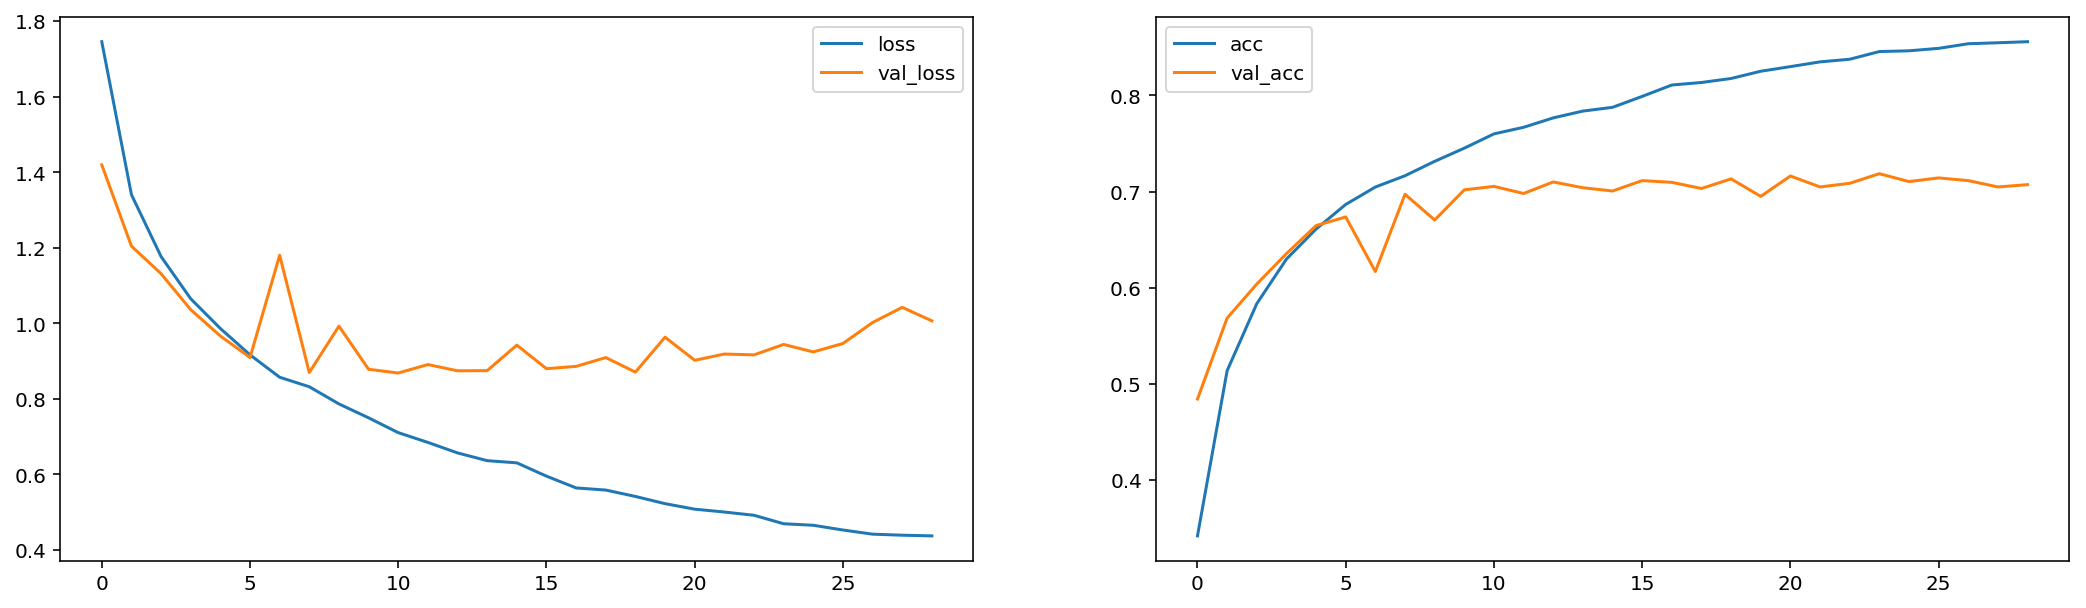

In [25]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(18,5))
ax1.plot(history.history['loss'], label="loss")
ax1.plot(history.history['val_loss'], label="val_loss")
ax1.legend()

ax2.plot(history.history['acc'], label="acc")
ax2.plot(history.history['val_acc'], label="val_acc")
ax2.legend()
plt.show();

In [26]:
model.load_weights('checkpoint.cifar10-cnn-tipo-VGG-16.hdf5')

ValueError: You are trying to load a weight file containing 7 layers into a model with 9 layers.